In [5]:
from ultralytics import YOLO
from source.lrp.yolo import YOLOv8LRP
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

# Load the image to be examined (here we take the bicycle bus im
orig_image = Image.open('bike_bus.JPEG')

# For model inference to work, the dimensions of the image needs to be a multiple of 32 so we set the desired dimensions when resizing
width = ((orig_image.size[0])//32)*32
height = ((orig_image.size[1])//32)*32

desired_size = (height, width)

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(desired_size),
    torchvision.transforms.ToTensor()])

model = YOLO('../models/weights/last.pt')

# Convert the image into tensor which will be fed into the model
image = transform(orig_image).float()

#Getting the prediction to be used in LRP (Layer-wise Relevance Propagation)
prediction = model(image)

# Initiate LRP feeding in the fine tuned model
lrp = YOLOv8LRP(model, power=2, eps=1e-05, device='cpu')


WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 512, 512) is incompatible.
0: 512x512 1 bicycle, 1 bus, 1 car, 61.7ms
Speed: 0.0ms preprocess, 61.7ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)


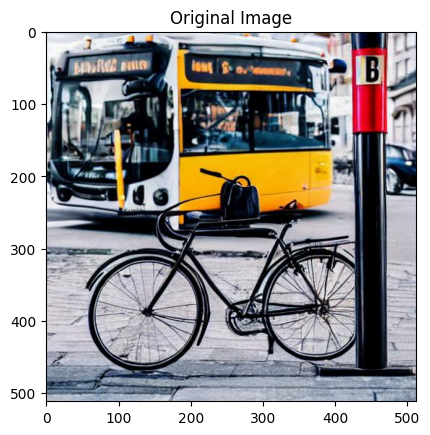

In [6]:
# Illustrating the original image 
plt.imshow(orig_image)
plt.title('Original Image')
plt.show()

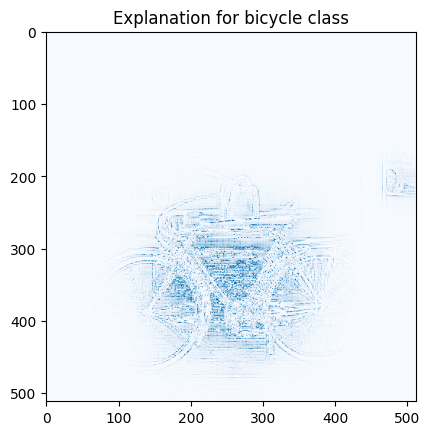

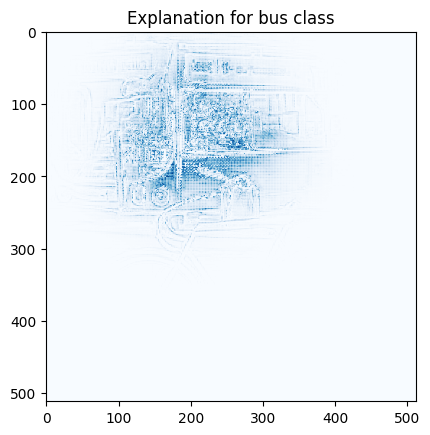

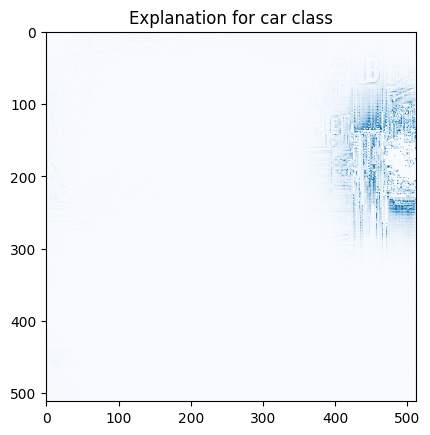

In [7]:
# Here we iterate through each unique class that was predicted by the model and illustrate the pixels that contributed to the model's output

for cls in prediction[0].boxes.cls.unique():
    class_name = prediction[0].names[int(cls.item())]
    explanation_lrp = lrp.explain(image, cls=class_name, contrastive=False).cpu()

    # Plotting the visualisation for each class predicted by the model
    plt.imshow(explanation_lrp, cmap='Blues')
    plt.title('Explanation for {} class'.format(class_name))
    plt.show()
    